In [1]:
!pip install torch-geometric
!pip install torch-sparse -f https://data.pyg.org/whl/torch-1.13.1+cu116.html
!pip install torch-scatter -f https://data.pyg.org/whl/torch-1.13.1+cu116.html     # version should be same 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.13.1+cu116.html
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.13.1+cu116.html


In [3]:
import torch
import torch.nn.functional as F
from torch_geometric.datasets import TUDataset
from torch_geometric.data import DataLoader
from torch_geometric.nn import GCNConv, global_max_pool

# Define the model architecture
class Net(torch.nn.Module):
    def __init__(self, num_features, hidden_channels, num_classes):
        super(Net, self).__init__()
        self.conv1 = GCNConv(num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.fc1 = torch.nn.Linear(hidden_channels, hidden_channels)
        self.fc2 = torch.nn.Linear(hidden_channels, num_classes)

    def forward(self, x, edge_index, batch):
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        x = global_max_pool(x, batch)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Prepare the data
dataset = TUDataset(root='/tmp/ENZYMES', name='ENZYMES')
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

# Define the model and optimizer
model = Net(num_features=dataset.num_features, hidden_channels=64, num_classes=dataset.num_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Train the model
model.train()
for epoch in range(200):
    for batch in train_loader:
        optimizer.zero_grad()
        out = model(batch.x, batch.edge_index, batch.batch)
        loss = F.cross_entropy(out, batch.y)
        loss.backward()
        optimizer.step()

# Evaluate the model on a test dataset
model.eval()
test_loader = DataLoader(dataset, batch_size=32, shuffle=False)
for batch in test_loader:
    pred = model(batch.x, batch.edge_index, batch.batch).argmax(dim=1)
    acc = (pred == batch.y).sum().item() / batch.num_graphs
print('Test Accuracy: {:.3f}'.format(acc))


Test Accuracy: 0.542


In [7]:
for batch in test_loader:
    pred = model(batch.x, batch.edge_index, batch.batch).argmax(dim=1)
    print(pred)
    print("batch" ,batch.y)

  

tensor([2, 4, 0, 5, 0, 0, 4, 3, 5, 1, 5, 1, 1, 1, 3, 2, 5, 3, 1, 1, 5, 5, 5, 5,
        5, 5, 3, 0, 0, 2, 5, 5])
batch tensor([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5])
tensor([5, 5, 5, 5, 5, 1, 5, 5, 2, 5, 5, 5, 5, 2, 5, 5, 5, 5, 1, 1, 0, 4, 5, 4,
        5, 4, 1, 5, 5, 5, 3, 5])
batch tensor([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5])
tensor([5, 5, 5, 5, 3, 3, 3, 5, 0, 4, 5, 5, 4, 5, 4, 5, 4, 3, 5, 1, 5, 5, 5, 5,
        5, 5, 1, 3, 5, 5, 4, 1])
batch tensor([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5])
tensor([0, 0, 5, 1, 4, 4, 4, 0, 0, 3, 0, 2, 0, 0, 5, 4, 4, 4, 4, 4, 4, 1, 4, 4,
        2, 4, 2, 4, 4, 4, 1, 1])
batch tensor([5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4])
tensor([4, 4, 4, 4, 4, 4, 4, 1, 2, 5, 4, 4, 1, 4, 0, 3, 4, 3, 4, 4, 4, 4

In [ ]:
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel,self).__init__()
        
        #input channel 1 : gray images
        #kernel_size : filter sizes
        #
        self.conv1=nn.Conv2d(in_channels=1,out_channels=32,kernel_size=3)
        
        # Linear layer : (input,output)
        self.d1=nn.Linear(26*26*32,128)
        # 10 is the number of classes
        self.d2=nn.Linear(128,10)
        
    def forward(self,x):
        #32x1x248x28 : 32 is batch size
        x=self.conv1(x)
        x=F.relu(x)
        
        #flatten 32 x (32x26x26)
        x=x.flatten(start_dim=1)
        
        # 32x26x26) ==> 322x128
        x=self.d1(x)
        x=F.relu(x)
        
        #32x10
        logits=self.d2(x)
        out=F.softmax(logits,dim=1)
        return out
        

In [ ]:
learning_rate = 0.001
num_epochs = 5

device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model= MyModel()
model=model.to(device)
criterion= nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)

In [ ]:
for epoch in range(num_epochs):
    train_running_loss=0.0
    train_acc=0.0
    
    for i, (images,labels)  in enumerate(trainloader):
        images=images.to(device)
        labels=labels.to(device)
        
        logits = model(images)
        loss=criterion(logits,labels)
        
        #if we don't write this: pytorch accumulate gradiants
        optimizer.zero_grad()
        loss.backward() # computes gradiants
        optimizer.step()
        
        train_running_loss += loss.detach().item()
        train_acc += (torch.argmax(logits,1).flatten()==labels).type(torch.float).mean().item()
    
    print('Epoch: %d , Loss: %.4f , Train ACC: %.2f'\
          %(epoch,train_running_loss/i,train_acc/i))

Epoch: 0 , Loss: 1.6008 , Train ACC: 0.86
Epoch: 1 , Loss: 1.4961 , Train ACC: 0.97
Epoch: 2 , Loss: 1.4839 , Train ACC: 0.98
Epoch: 3 , Loss: 1.4784 , Train ACC: 0.99
Epoch: 4 , Loss: 1.4758 , Train ACC: 0.99


TypeError: ignored

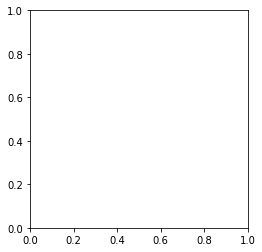

In [ ]:
import matplotlib.pyplot as plt

# Define mapping from class labels to characters
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

test_acc= 0.00
for i,(images,labels) in enumerate(testloader,0):
    images=images.to(device)
    labels=labels.to(device)
    plt.imshow(images)
    plt.show()
    outputs=model(images)
    test_acc += (torch.argmax(outputs,1).flatten()==labels).type(torch.float).mean().item()
    
    preds = torch.argmax(outputs, 1).flatten().cpu().numpy()
    char_preds = [classes[label] for label in preds]
    # print('labels',labels)
    # print('pred',preds[0])
    print('Character predictions:', char_preds)
    
print("Test ACC: %0.2f"%(test_acc/i))